# 딥러닝3 : 다중분류


## 1.환경준비

### (1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session
from keras.optimizers import Adam

* 함수 만들기

In [2]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

In [3]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/iris.csv"
data = pd.read_csv(path)
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 2.데이터 준비

### (1) y 값을 0,1,2로 변환하기
(sparse_categorical_crossentropy 사용을 위해)

In [4]:
data['Species'] = data['Species'].map({'setosa':0, 'versicolor':1, 'virginica':2})
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### (2) 데이터 준비

In [5]:
target = 'Species'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

### (3) 데이터 분할 : train : val

In [6]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .3, random_state = 20)

### (4) Scaling

In [7]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

## 3.모델링1

### (1) 모델 설계

In [ ]:
nfeatures = x_train.shape[1] #num of columns
nfeatures

4

In [ ]:
# 메모리 정리
clear_session()

# Sequential
model = Sequential( Dense( 3 , input_shape = (nfeatures,), activation = 'softmax') ) # 다중 분류의 output은 class 개수임

# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 15        
                                                                 
Total params: 15 (60.00 Byte)
Trainable params: 15 (60.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### (2) compile + 학습

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.1), loss= 'sparse_categorical_crossentropy')

history = model.fit(x_train, y_train, epochs = 50, validation_split=0.2).history

Epoch 1/50
3/3 [==============================] - 1s 174ms/step - loss: 1.0347 - val_loss: 0.8939
Epoch 2/50
3/3 [==============================] - 0s 32ms/step - loss: 0.8721 - val_loss: 0.7395
Epoch 3/50
3/3 [==============================] - 0s 38ms/step - loss: 0.7407 - val_loss: 0.6087
Epoch 4/50
3/3 [==============================] - 0s 32ms/step - loss: 0.6462 - val_loss: 0.5144
Epoch 5/50
3/3 [==============================] - 0s 38ms/step - loss: 0.5783 - val_loss: 0.4546
Epoch 6/50
3/3 [==============================] - 0s 40ms/step - loss: 0.5235 - val_loss: 0.4164
Epoch 7/50
3/3 [==============================] - 0s 34ms/step - loss: 0.4844 - val_loss: 0.3874
Epoch 8/50
3/3 [==============================] - 0s 26ms/step - loss: 0.4513 - val_loss: 0.3593
Epoch 9/50
3/3 [==============================] - 0s 36ms/step - loss: 0.4252 - val_loss: 0.3409
Epoch 10/50
3/3 [==============================] - 0s 33ms/step - loss: 0.4027 - val_loss: 0.3268
Epoch 11/50
3/3 [===========

* 학습결과 그래프

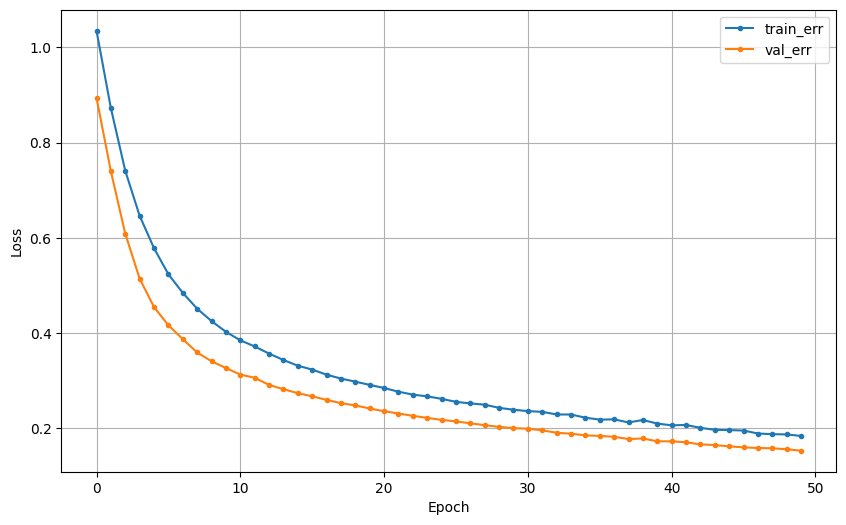

In [ ]:
dl_history_plot(history)

### (3) 예측 및 검증
* 예측 결과는 softmax로 변환된 값 입니다.

In [ ]:
y_val[:5]

47     0
73     1
74     1
129    2
67     1
Name: Species, dtype: int64

In [ ]:
pred = model.predict(x_val)
pred[:5]

2/2 [==============================] - 0s 6ms/step


array([[9.7859329e-01, 2.1371365e-02, 3.5326346e-05],
       [1.0944421e-02, 8.1494582e-01, 1.7410964e-01],
       [1.3628961e-02, 7.6788509e-01, 2.1848592e-01],
       [3.8800607e-04, 3.5111663e-01, 6.4849532e-01],
       [3.3144914e-02, 8.9750290e-01, 6.9352120e-02]], dtype=float32)

* 행 별로 제일 큰 값을 찾아서 그에 맞게 숫자(0,1,2)로 변환 합시다.

In [ ]:
# 5개 행만 살펴보면
np.argmax(pred[:5], axis = 1) # 각 행단위로 가장 큰 값의 인덱스

array([0, 1, 1, 2, 1])

In [ ]:
# 전체에 적용해서 변환합시다.
pred_1 = pred.argmax(axis=1)
pred_1

array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 2, 1, 1, 2,
       2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 0, 1,
       1])

* 실제값 y_val은 0,1,2 로 된 1차원 값입니다.

In [ ]:
y_val

47     0
73     1
74     1
129    2
67     1
89     1
143    2
21     0
108    2
12     0
147    2
76     1
119    2
35     0
28     0
122    2
13     0
58     1
114    2
57     1
50     1
149    2
111    2
20     0
72     1
81     1
98     1
34     0
104    2
133    2
95     1
88     1
0      0
46     0
11     0
106    2
85     1
1      0
51     1
130    2
55     1
134    2
37     0
65     1
56     1
Name: Species, dtype: int64

In [ ]:
print(confusion_matrix(y_val, pred_1))
print(classification_report(y_val, pred_1))

[[13  0  0]
 [ 0 18  0]
 [ 0  4 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.82      1.00      0.90        18
           2       1.00      0.71      0.83        14

    accuracy                           0.91        45
   macro avg       0.94      0.90      0.91        45
weighted avg       0.93      0.91      0.91        45



----

## 4.모델링2 : hidden layer

### (1) 모델1

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | Param # | 옵션 |
| ---- | ---- | ---- | ---- |
| dense (Dense) | (None, 8) | 40 | node, input_shape, activation = 'relu' |
| dense_1 (Dense) | (None, 3) | 27 | node, activation = 'softmax'  |

In [ ]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언
model = Sequential([Dense(8 , input_shape = (nfeatures,), activation = 'relu'),
                    Dense(3 , activation = 'softmax') ])

# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 3)                 27        
                                                                 
Total params: 67 (268.00 Byte)
Trainable params: 67 (268.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* compile + 학습

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.01), loss= 'sparse_categorical_crossentropy')

history = model.fit(x_train, y_train, epochs = 50, validation_split=0.2).history

Epoch 1/50
3/3 [==============================] - 1s 93ms/step - loss: 1.1825 - val_loss: 1.0952
Epoch 2/50
3/3 [==============================] - 0s 18ms/step - loss: 1.0895 - val_loss: 1.0228
Epoch 3/50
3/3 [==============================] - 0s 18ms/step - loss: 1.0231 - val_loss: 0.9654
Epoch 4/50
3/3 [==============================] - 0s 17ms/step - loss: 0.9678 - val_loss: 0.9108
Epoch 5/50
3/3 [==============================] - 0s 18ms/step - loss: 0.9173 - val_loss: 0.8521
Epoch 6/50
3/3 [==============================] - 0s 19ms/step - loss: 0.8666 - val_loss: 0.7890
Epoch 7/50
3/3 [==============================] - 0s 19ms/step - loss: 0.8123 - val_loss: 0.7265
Epoch 8/50
3/3 [==============================] - 0s 19ms/step - loss: 0.7610 - val_loss: 0.6704
Epoch 9/50
3/3 [==============================] - 0s 25ms/step - loss: 0.7197 - val_loss: 0.6209
Epoch 10/50
3/3 [==============================] - 0s 19ms/step - loss: 0.6763 - val_loss: 0.5795
Epoch 11/50
3/3 [============

* 학습결과 그래프

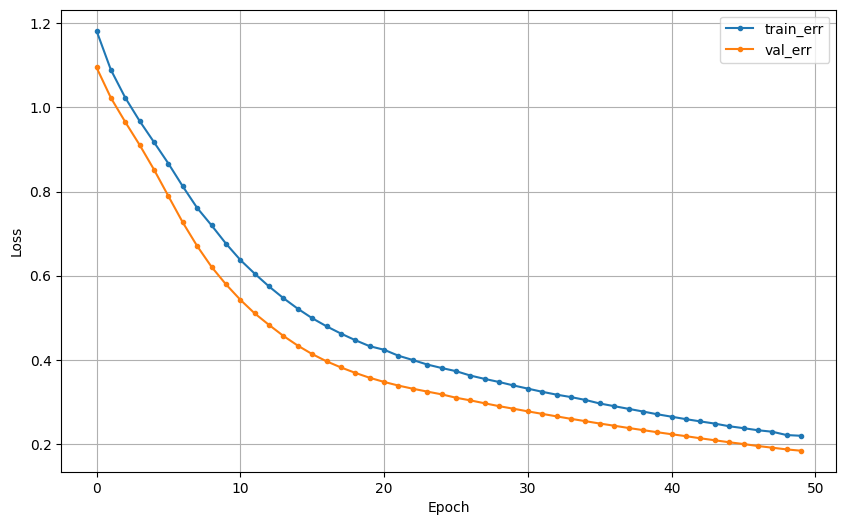

In [ ]:
dl_history_plot(history)

* 예측 및 검증
    * 예측 결과는 softmax로 변환된 값 입니다.

In [ ]:
pred = model.predict(x_val)
pred_1 = pred.argmax(axis=1)

2/2 [==============================] - 0s 5ms/step


In [ ]:
print(confusion_matrix(y_val, pred_1))
print(classification_report(y_val, pred_1))

[[13  0  0]
 [ 0 18  0]
 [ 0  4 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.82      1.00      0.90        18
           2       1.00      0.71      0.83        14

    accuracy                           0.91        45
   macro avg       0.94      0.90      0.91        45
weighted avg       0.93      0.91      0.91        45



### (2) 모델2

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | Param # | 옵션 |
| ---- | ---- | ---- | ---- |
| dense (Dense) | (None, 8) | 40 | node, input_shape, activation = 'relu' |
| dense_1 (Dense) | (None, 8) | 72 | node, activation = 'relu'  |
| dense_2 (Dense) | (None, 3) | 27 | node, activation = 'softmax'  |

In [ ]:
class_cnt = len(y_train.unique())

In [ ]:
clear_session()
model = Sequential([Dense(8, input_shape=(x_train.shape[1],), activation='relu'),
                    Dense(8, activation='relu'),
                    Dense(class_cnt, activation='softmax' )] )
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 3)                 27        
                                                                 
Total params: 139 (556.00 Byte)
Trainable params: 139 (556.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* compile + 학습

In [ ]:
y_train.unique() # 정수 인코딩 되어있다 -> sparse_categorical_crossentropy

array([0, 2, 1])

In [ ]:
model.compile( optimizer=Adam(learning_rate=0.1), loss='sparse_categorical_crossentropy')
history = model.fit(x_train, y_train, epochs=50, validation_split=.2, verbose=0).history

* 학습결과 그래프

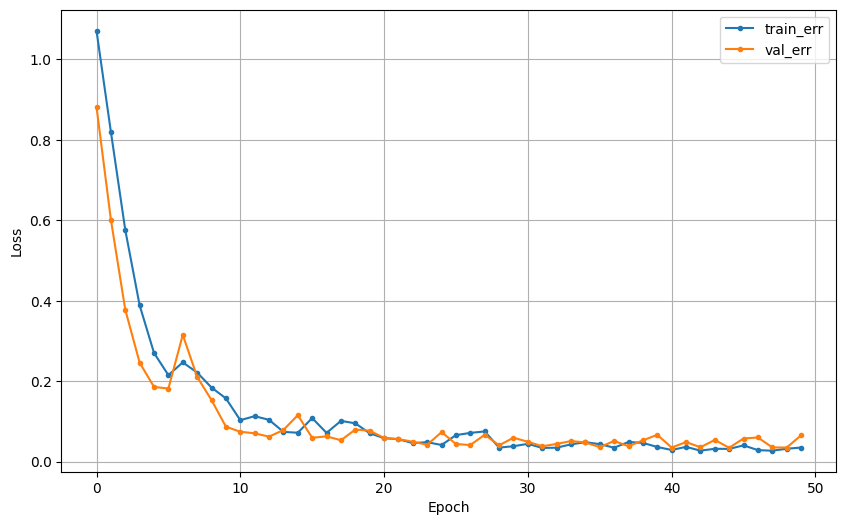

In [ ]:
dl_history_plot(history)

* 예측 및 검증
    * 예측 결과는 softmax로 변환된 값 입니다.

In [ ]:

help(np.argmax)

Help on _ArrayFunctionDispatcher in module numpy:

argmax(a, axis=None, out=None, *, keepdims=<no value>)
    Returns the indices of the maximum values along an axis.
    
    Parameters
    ----------
    a : array_like
        Input array.
    axis : int, optional
        By default, the index is into the flattened array, otherwise
        along the specified axis.
    out : array, optional
        If provided, the result will be inserted into this array. It should
        be of the appropriate shape and dtype.
    keepdims : bool, optional
        If this is set to True, the axes which are reduced are left
        in the result as dimensions with size one. With this option,
        the result will broadcast correctly against the array.
    
        .. versionadded:: 1.22.0
    
    Returns
    -------
    index_array : ndarray of ints
        Array of indices into the array. It has the same shape as `a.shape`
        with the dimension along `axis` removed. If `keepdims` is set to T

In [ ]:
y_pred = model.predict(x_val)
y_pred[:5]

2/2 [==============================] - 0s 9ms/step


array([[9.9948496e-01, 5.1496393e-04, 4.5030257e-14],
       [1.9309101e-07, 9.9978614e-01, 2.1362296e-04],
       [1.4483412e-07, 9.9988180e-01, 1.1803235e-04],
       [2.3771331e-14, 4.1427901e-01, 5.8572102e-01],
       [3.4092617e-04, 9.9965405e-01, 5.0629542e-06]], dtype=float32)

In [ ]:
y_pred = np.argmax(y_pred, axis=1)
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[13  0  0]
 [ 0 18  0]
 [ 0  2 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.90      1.00      0.95        18
           2       1.00      0.86      0.92        14

    accuracy                           0.96        45
   macro avg       0.97      0.95      0.96        45
weighted avg       0.96      0.96      0.96        45



### (3) 모델3

* 여러분이 원하는 형태로 설계를 해 봅시다.

* compile + 학습

* 학습결과 그래프

* 예측 및 검증
    * 예측 결과는 softmax로 변환된 값 입니다.

## 5.참조 : y를 one-hot encoding 하여 모델링

* y 가변수화 : to_categorical
* 컴파일에서 loss = 'categorical_crossentropy'

In [8]:
from keras.utils import to_categorical

### (1) y에 대한 가변수화

In [9]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [10]:
y_c = to_categorical(y.values, 3) # data와 class 개수 지정

In [11]:
y_c[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

### (2) 데이터 분할2 : train : val

In [12]:
x_train, x_val, y_train, y_val = train_test_split(x, y_c, test_size = .3, random_state = 2022)

In [13]:
x_train[:5]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
136,6.3,3.4,5.6,2.4
102,7.1,3.0,5.9,2.1
120,6.9,3.2,5.7,2.3
3,4.6,3.1,1.5,0.2
149,5.9,3.0,5.1,1.8


In [14]:
type(x_train)

pandas.core.frame.DataFrame

In [15]:
y_train.shape

(105, 3)

### (3) Scaling

In [16]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (4) 모델 설계

In [18]:
nfeatures = x_train.shape[1] #num of columns
nfeatures

4

In [19]:
# 메모리 정리
clear_session()

# Sequential
model = Sequential([Dense(3, input_shape = (nfeatures,), activation = 'softmax')])

# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 15        
                                                                 
Total params: 15 (60.00 Byte)
Trainable params: 15 (60.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### (5) compile + 학습

* lr과 learning_rate은 같은 의미 입니다. 그러나 향후 버전에서는 lr이 제외될 예정이라고 합니다.
* y를 one-hot encoding 했다면, loss fuction은 **categorical_crossentropy** 입니다.

In [20]:
model.compile(optimizer=Adam(learning_rate=0.1), loss='categorical_crossentropy')

history = model.fit(x_train, y_train, epochs = 100,
                    validation_split=0.2).history

Epoch 1/100
3/3 [==============================] - 2s 286ms/step - loss: 0.9827 - val_loss: 0.9087
Epoch 2/100
3/3 [==============================] - 0s 26ms/step - loss: 0.8157 - val_loss: 0.7488
Epoch 3/100
3/3 [==============================] - 0s 36ms/step - loss: 0.6958 - val_loss: 0.6296
Epoch 4/100
3/3 [==============================] - 0s 45ms/step - loss: 0.6251 - val_loss: 0.5545
Epoch 5/100
3/3 [==============================] - 0s 33ms/step - loss: 0.5621 - val_loss: 0.5078
Epoch 6/100
3/3 [==============================] - 0s 33ms/step - loss: 0.5195 - val_loss: 0.4838
Epoch 7/100
3/3 [==============================] - 0s 34ms/step - loss: 0.5062 - val_loss: 0.4507
Epoch 8/100
3/3 [==============================] - 0s 43ms/step - loss: 0.4764 - val_loss: 0.4183
Epoch 9/100
3/3 [==============================] - 0s 25ms/step - loss: 0.4511 - val_loss: 0.3996
Epoch 10/100
3/3 [==============================] - 0s 25ms/step - loss: 0.4346 - val_loss: 0.3831
Epoch 11/100
3/3 [

* 학습결과 그래프

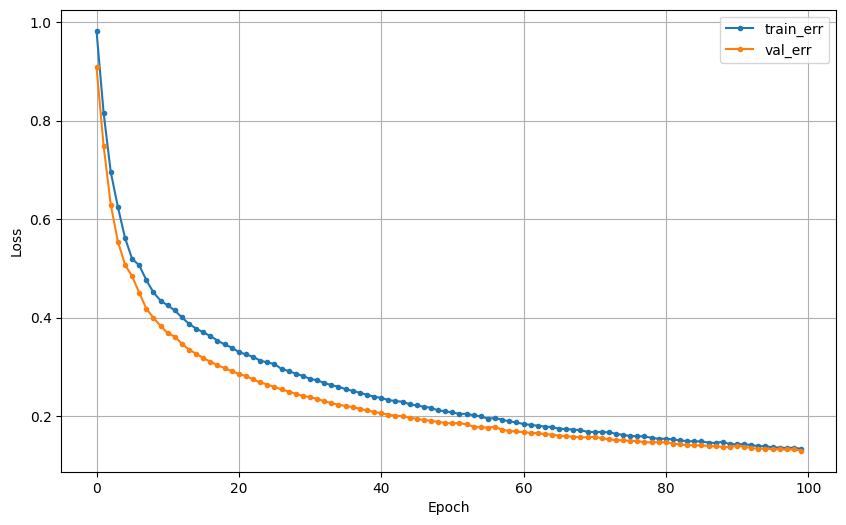

In [21]:
dl_history_plot(history)

### (6) 예측 및 평가
* 예측 결과는 softmax로 변환된 값 입니다.

In [22]:
pred = model.predict(x_val)
pred[:5] # softmax로 확률로 변환한 결과, one hot encoding과는 무관함

2/2 [==============================] - 0s 6ms/step


array([[6.42484792e-06, 4.17974293e-02, 9.58196104e-01],
       [1.81136386e-07, 5.09534925e-02, 9.49046314e-01],
       [9.76221263e-01, 2.37782467e-02, 4.57573094e-07],
       [2.21894603e-04, 3.32151324e-01, 6.67626798e-01],
       [9.88231599e-01, 1.17682721e-02, 1.10007456e-07]], dtype=float32)

* 행 별로 제일 큰 값을 찾아서 그에 맞게 숫자(0,1,2)로 변환 합시다.

In [23]:
# 5개 행만 살펴보면
np.argmax(pred[:5], axis = 1)

array([2, 2, 0, 2, 0])

In [24]:
y_val

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [26]:
# 전체에 적용해서 변환합시다.
pred_1 = pred.argmax(axis=1)
pred_1

array([2, 2, 0, 2, 0, 0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 0, 1, 1, 2, 1, 0, 0,
       2, 0, 2, 1, 2, 0, 2, 2, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 2, 1, 1, 2,
       2])

* 실제값 y_val도 원래 대로 돌려 놓습니다.

In [27]:
y_val[:5]

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [28]:
y_val_1 = y_val.argmax(axis=1) # test data도 기존에 one hot encoding 했기 때문에, 비교를 위해선 다시 정수 인코딩
y_val_1

array([2, 2, 0, 2, 0, 0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 0, 1, 2, 2, 1, 0, 0,
       2, 0, 2, 2, 2, 0, 1, 2, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 2, 1, 1, 2,
       2])

In [29]:
print(confusion_matrix(y_val_1, pred_1))
print(classification_report(y_val_1, pred_1))

[[14  0  0]
 [ 0 14  1]
 [ 0  2 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.88      0.93      0.90        15
           2       0.93      0.88      0.90        16

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45

